# Model test
***
Test DenseNet 

In [107]:
# Libraries

import os
from PIL import Image
import itertools

import cv2
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

print('Modules Successfully Loaded')

Modules Successfully Loaded


## Dataframe to split train and test and validation

In [108]:
data_dir= "./Multi-class Weather Dataset"
paths = []
labels = []
folds = os.listdir(data_dir)
for fold in folds :
    condition_path = data_dir +"/" + fold
    all_pic = os.listdir(condition_path)
    for each_pic in all_pic:
        each_pic_path = condition_path +"/" + each_pic
        paths.append(each_pic_path)
        labels.append(fold)
        
pseries = pd.Series(paths, name='Picture Path')
lseries = pd.Series(labels, name='Label')

df = pd.concat([pseries, lseries], axis =1)
df.head()

,Picture Path,Label
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy


In [109]:
import os
from PIL import Image

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height 

# Add columns to dataframe
df['width'], df['height'] = zip(*df['Picture Path'].map(get_image_dimensions))

df.head()


,Picture Path,Label,width,height
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy,600,400
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy,271,186
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy,259,194
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy,338,149
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy,800,377


# Width and height distribution 

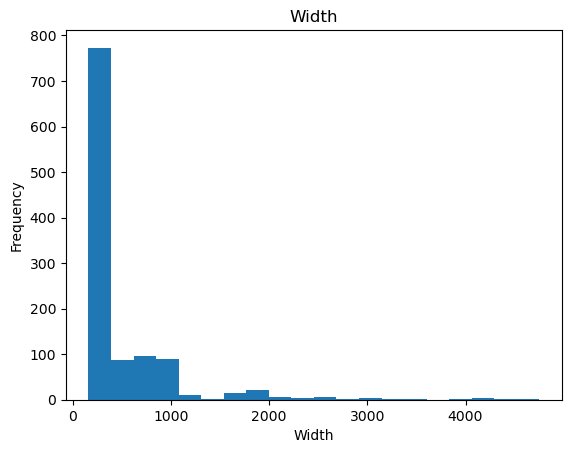

300


In [110]:
plt.hist(df['width'], bins=20)
plt.title('Width')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()
width_counts = df['width'].value_counts()
max_width = width_counts.idxmax()
print(max_width)


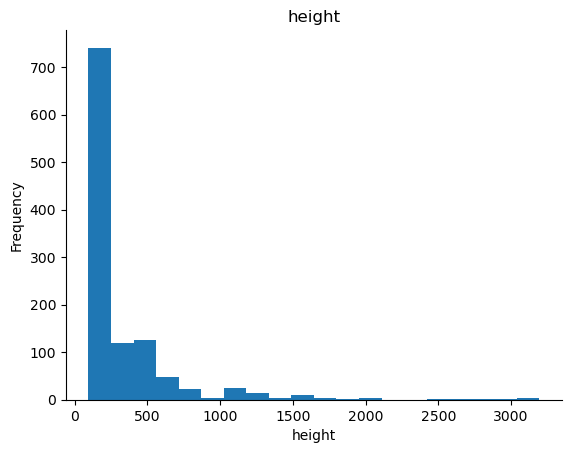

168


In [111]:
plt.hist(df['height'], bins=20)
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
height_counts = df['height'].value_counts()
max_height = height_counts.idxmax()
print(max_height)

# Nombre d'images par classe

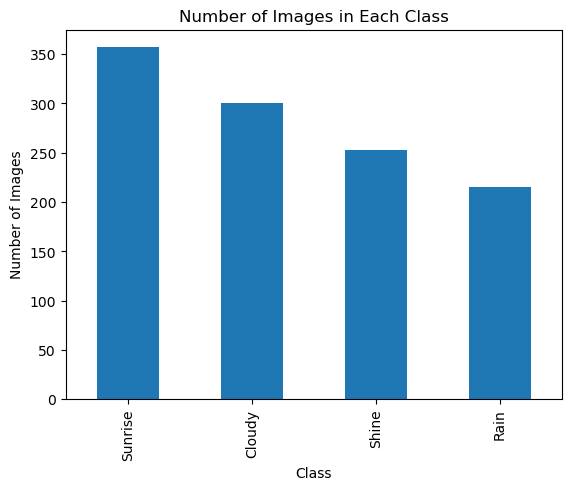

In [112]:
class_counts = df['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.show() 

# Tendance centrale

In [113]:
import matplotlib.pyplot as plt

min_width = df['width'].min()
max_width = df['width'].max()
median_width = df['width'].median()
q1_width = df['width'].quantile(0.25)
q3_width = df['width'].quantile(0.75)
std_width = df['width'].std()

min_height = df['height'].min()
max_height = df['height'].max()
median_height = df['height'].median()
q1_height = df['height'].quantile(0.25)
q3_height = df['height'].quantile(0.75)
std_height = df['height'].std()

# Print the statistics
print('Width:')
print('Minimum:', min_width)
print('Maximum:', max_width)
print('Median:', median_width)
print('First Quartile:', q1_width)
print('Third Quartile:', q3_width)
print('Standard Deviation:', std_width)

print('Height:')
print('Minimum:', min_height)
print('Maximum:', max_height)
print('Median:', median_height)
print('First Quartile:', q1_height)
print('Third Quartile:', q3_height)
print('Standard Deviation:', std_height)


Width:
Minimum: 158
Maximum: 4752
Median: 284.0
First Quartile: 259.0
Third Quartile: 600.0
Standard Deviation: 539.2877747078892
Height:
Minimum: 94
Maximum: 3195
Median: 183.0
First Quartile: 168.0
Third Quartile: 384.0
Standard Deviation: 355.14168742391115


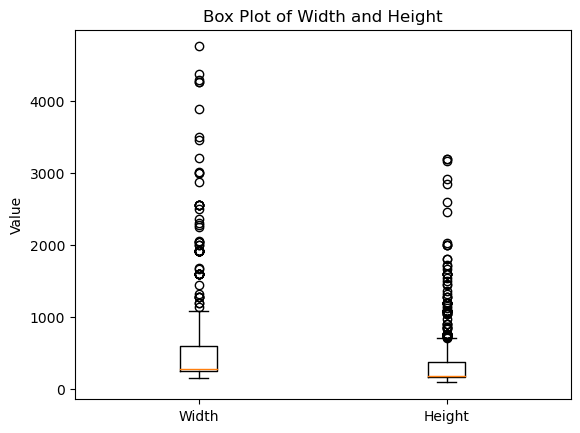

In [114]:
plt.boxplot([df['width'], df['height']], labels=['Width', 'Height'])
plt.title('Box Plot of Width and Height')
plt.ylabel('Value')
plt.show()

Mean Height: 334.75377777777777
Mean Width: 506.3031111111111


<Axes: xlabel='Metric'>

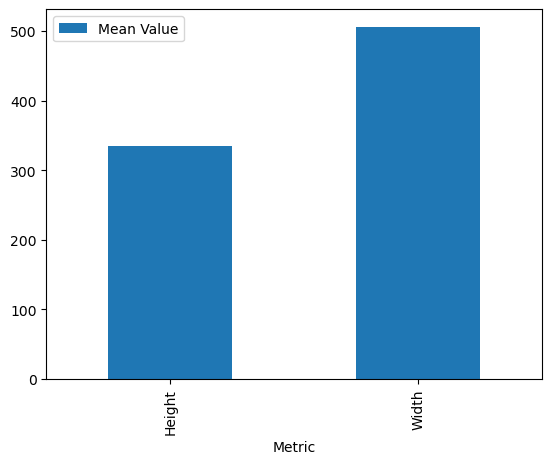

In [115]:
# Valeur moyenne de la largeur et de la hauteur

mean_height = df['height'].mean()
mean_width = df['width'].mean()
print('Mean Height:', mean_height)
print('Mean Width:', mean_width)    
mean_df = pd.DataFrame({'Metric': ['Height', 'Width'], 'Mean Value': [mean_height, mean_width]})
mean_df.plot(x='Metric', y='Mean Value', kind='bar')


In [116]:
df.to_csv('filename.csv', index=False)


## Train test val 

In [117]:
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, stratify=df["Label"], random_state=42)

In [118]:
train_set.head()

,Picture Path,Label,width,height
296,./Multi-class Weather Dataset/Cloudy/cloudy96.jpg,Cloudy,299,168
413,./Multi-class Weather Dataset/Rain/rain200.jpg,Rain,612,405
605,./Multi-class Weather Dataset/Shine/shine180.jpg,Shine,244,183
292,./Multi-class Weather Dataset/Cloudy/cloudy92.jpg,Cloudy,299,168
555,./Multi-class Weather Dataset/Shine/shine135.jpg,Shine,238,212


In [119]:
test_set.head()

,Picture Path,Label,width,height
1018,./Multi-class Weather Dataset/Sunrise/sunrise3...,Sunrise,252,168
50,./Multi-class Weather Dataset/Cloudy/cloudy144...,Cloudy,259,194
927,./Multi-class Weather Dataset/Sunrise/sunrise2...,Sunrise,233,161
58,./Multi-class Weather Dataset/Cloudy/cloudy151...,Cloudy,1920,1280
797,./Multi-class Weather Dataset/Sunrise/sunrise1...,Sunrise,1024,557


## Image Data generator 

In [120]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

print("Train Set:")
train_gen = tr_gen.flow_from_dataframe(train_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)


print("Test Set:")
test_gen = ts_gen.flow_from_dataframe(test_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)


Train Set:
Found 900 validated image filenames belonging to 4 classes.
Test Set:
Found 225 validated image filenames belonging to 4 classes.


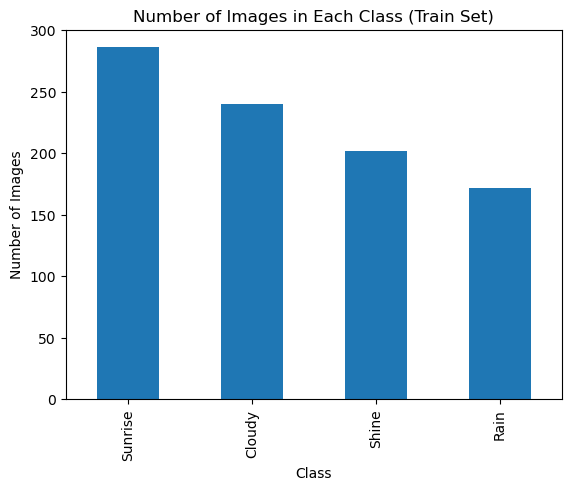

In [121]:

class_counts = train_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train Set)')
plt.show() 


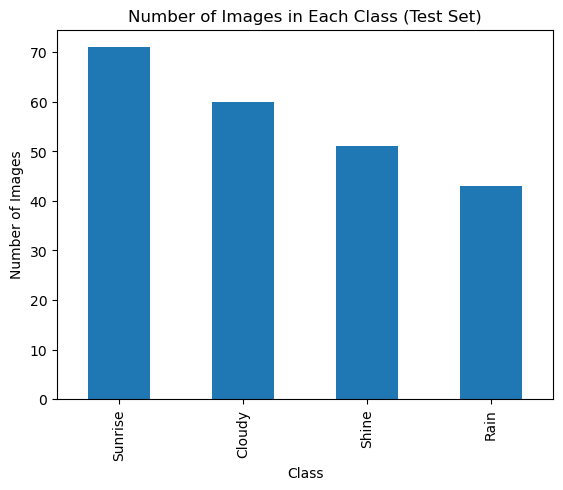

In [122]:
class_counts = test_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Test Set)')
plt.show()

## Visualize data

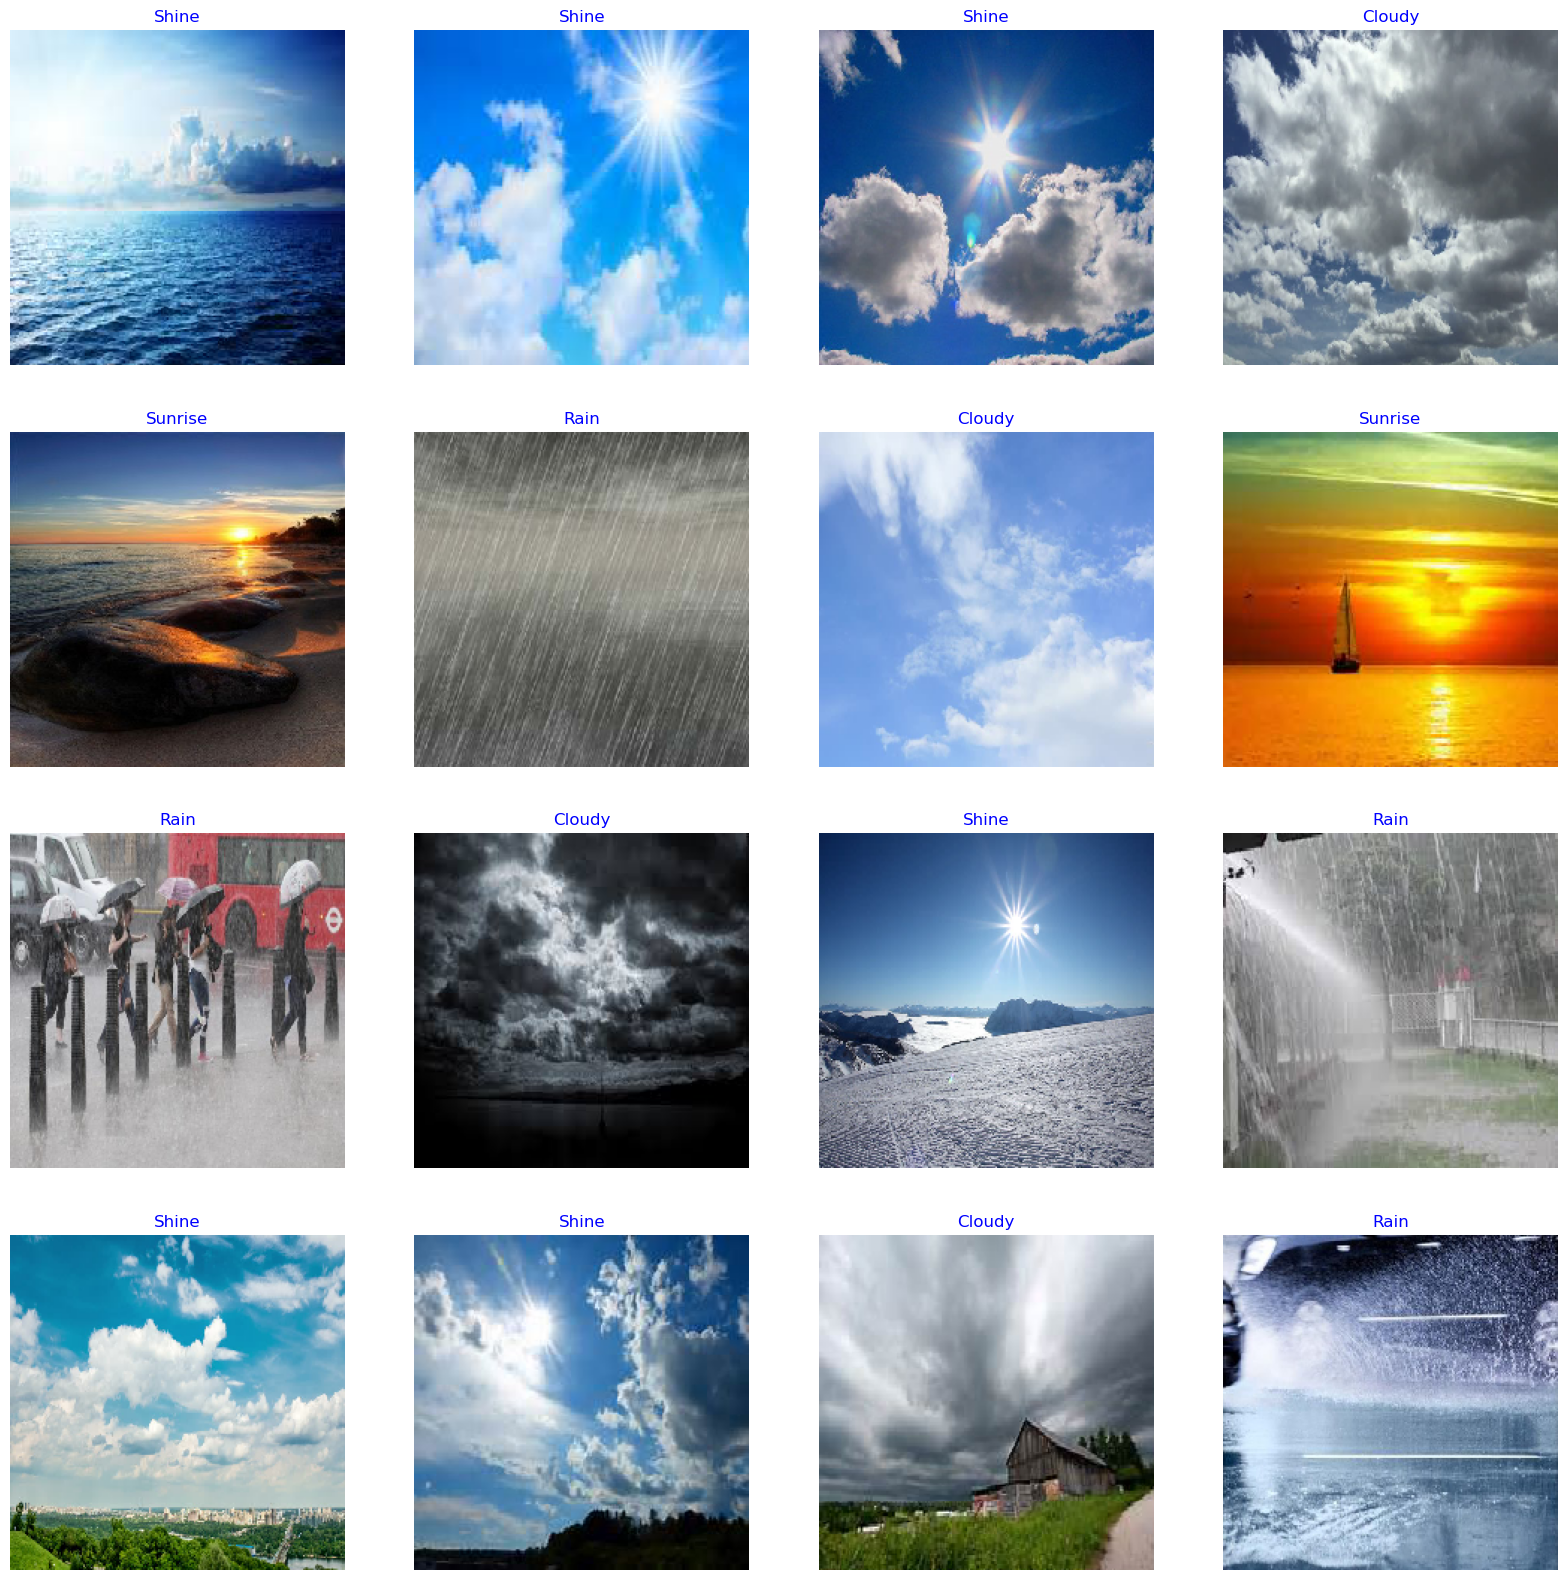

In [123]:
g_dict = train_gen.class_indices  
classes = list(g_dict.keys())    
images, labels = next(train_gen)     
plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

## Distribution et Tendance central de luminance 

In [124]:
from skimage import io, color

def get_luminance(path):
    image = io.imread(path)
    gray_image = color.rgb2gray(image)
    luminance_mean = np.mean(gray_image)
    return luminance_mean

luminance = get_luminance(df['Picture Path'][0])
luminance


0.4034989215686274

In [128]:
def calculate_luminance(path):
    try:
        return get_luminance(path)
    except:
        return None

df['Mean Luminance'] = None  

for i in range(len(df["Picture Path"])):
    luminance = calculate_luminance(df['Picture Path'][i])
    print(luminance)
    df.loc[i, 'Mean Luminance'] = luminance 

0.4034989215686274
0.613927039933777
0.5506449658113455
0.5643087600439486
0.5352161635057471
0.4878296051118709
0.4292564733545679
0.44728118310768755
0.43151805703392465
0.476044961366802
0.6464810897642217
0.6426423491006115
0.5504616262737155
0.5943367705412713
0.5183772510542249
0.7048054230292458
0.5417345197705719
0.559906264511757
0.3831948952010648
0.4824122945827207
0.41674114871346296
0.5207037023023198
0.3653299204565262
0.4014283013227513
0.41933577203991834
0.47010627097931124
0.4642234818401148
0.5761379992041025
0.4729827150336165
0.6307202736103439
0.7057029564586592
0.6863719065853079
0.5878316620969926
0.6058146310577723
0.4748306864337337
0.6971382909381388
0.6065238893028323
0.5832225213480392
0.4968165634724217
0.5499980106429739
0.5637568135821115
0.3173783010477548
0.18603854556839228
0.2085943160281698
0.2429375803473501
0.4141732081925492
0.28505368335895426
0.5059137196811576
0.43726764278393043
0.3531181110892674
0.4362962014418473
0.539211786328976
0.535216

In [133]:
df.fillna(0, inplace=True)
df.tail()

,Picture Path,Label,width,height,Mean Luminance
1120,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,1600,1049,0.221634
1121,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,3008,2000,0.177505
1122,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,300,168,0.331269
1123,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,1024,576,0.226069
1124,./Multi-class Weather Dataset/Sunrise/sunrise9...,Sunrise,283,178,0.320503


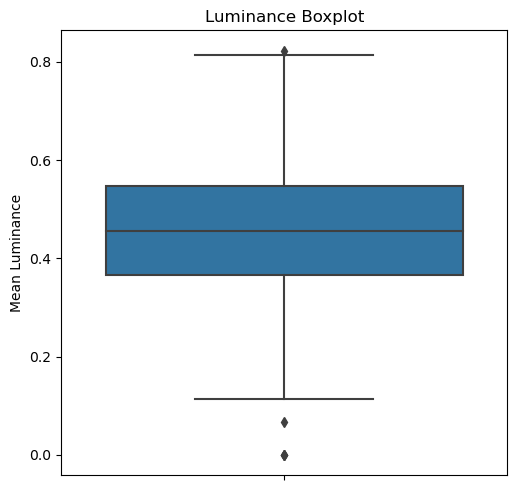

(             width       height  Mean Luminance
 count  1125.000000  1125.000000     1125.000000
 mean    506.303111   334.753778        0.457003
 std     539.287775   355.141687        0.134058
 min     158.000000    94.000000        0.000000
 25%     259.000000   168.000000        0.365330
 50%     284.000000   183.000000        0.455543
 75%     600.000000   384.000000        0.548257
 max    4752.000000  3195.000000        0.823209,
            width      height  Mean Luminance
 mean  506.303111  334.753778        0.457003
 50%   284.000000  183.000000        0.455543,
            width       height  Mean Luminance
 std   539.287775   355.141687        0.134058
 min   158.000000    94.000000        0.000000
 max  4752.000000  3195.000000        0.823209)

In [135]:

import seaborn as sns
# Let's do a descriptive analysis on this DataFrame
descriptive_stats = df.describe()

# Analyze central tendency
central_tendency = descriptive_stats.loc[['mean', '50%']]

# Analyze dispersion
dispersion = descriptive_stats.loc[['std', 'min', 'max']]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Mean Luminance'])
plt.title('Luminance Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

descriptive_stats, central_tendency, dispersion

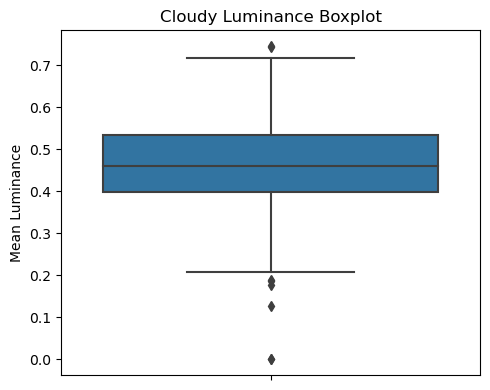

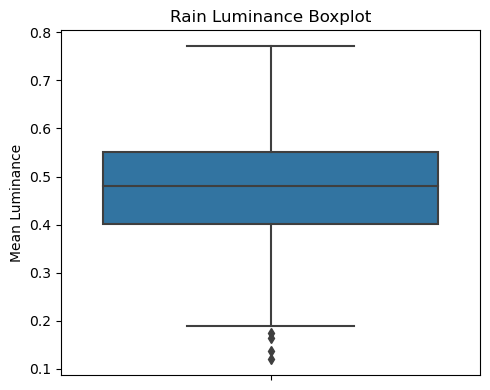

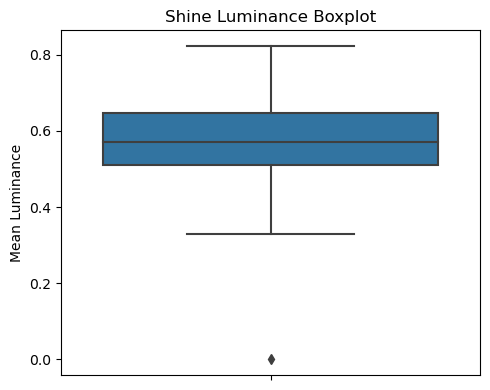

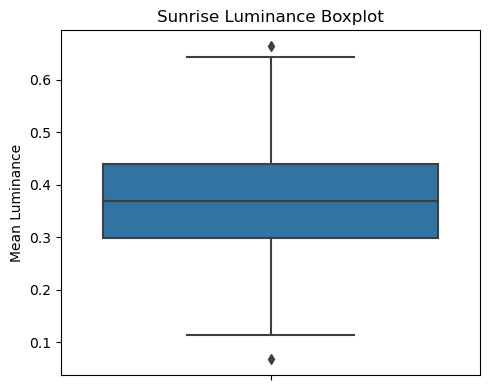

In [148]:
classes = df['Label'].unique()
results = {}
for label in classes:
    # Filter the DataFrame for the current class
    class_df = df[df['Label'] == label]
    
    # Descriptive analysis on the class DataFrame
    descriptive_stats = class_df.describe()
    
    # Analyze central tendency
    central_tendency = descriptive_stats.loc[['mean', '50%']]
    
    # Analyze dispersion
    dispersion = descriptive_stats.loc[['std', 'min', 'max']]
    
    # Generate boxplot for Luminance
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=class_df['Mean Luminance'])
    plt.title(f'{label} Luminance Boxplot')
    plt.tight_layout()
    plt.show()
    
    # Store results in a dictionary
    results[label] = {
        'Descriptive Statistics': descriptive_stats,
        'Central Tendency': central_tendency,
        'Dispersion': dispersion
    }


In [158]:
results['Cloudy']

{'Descriptive Statistics':              width       height  Mean Luminance
 count   300.000000   300.000000      300.000000
 mean    416.083333   277.503333        0.456227
 std     332.346220   230.356703        0.114250
 min     183.000000   134.000000        0.000000
 25%     246.500000   167.000000        0.398365
 50%     274.500000   178.000000        0.461195
 75%     381.250000   300.000000        0.534554
 max    2000.000000  2000.000000        0.746376,
 'Central Tendency':            width      height  Mean Luminance
 mean  416.083333  277.503333        0.456227
 50%   274.500000  178.000000        0.461195,
 'Dispersion':           width       height  Mean Luminance
 std   332.34622   230.356703        0.114250
 min   183.00000   134.000000        0.000000
 max  2000.00000  2000.000000        0.746376}